**Importing Necessary Libraries**

In [ ]:
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

**Uploading Data**

In [ ]:
data = pd.read_csv("/content/laptop_price - dataset.csv")

**Checking Data Details**

In [ ]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
data.shape

(1275, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


**Checking Duplicate or Null Values**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


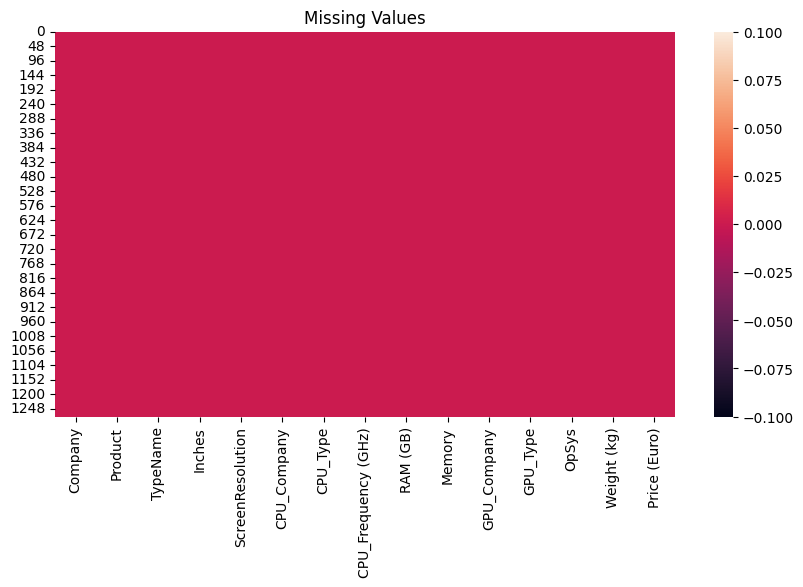

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull())
plt.title("Missing Values")
plt.show()

**Data Columns Preprocessing one by one**

**---------- Inches ----------**

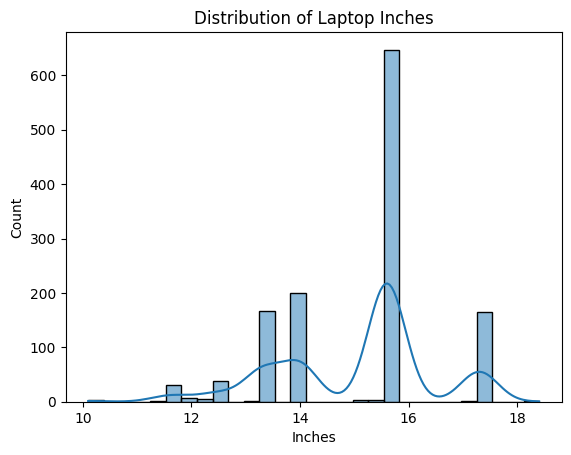

In [ ]:
sns.histplot(data['Inches'], kde=True)
plt.title("Distribution of Laptop Inches")
plt.xlabel("Inches")
plt.show()

**---------- Screen Resolution Feature Engineering ----------**

In [ ]:
data["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [ ]:
def has_touchscreen(resolution):
    if "Touchscreen" in resolution or "Touch" in resolution:
        return 1
    else:
        return 0

data['Touchscreen'] = data['ScreenResolution'].apply(has_touchscreen)

In [ ]:
def has_panel(resolution):
    if "IPS Panel" in resolution or "IPS" in resolution:
        return 1
    else:
        return 0

data["IPS_Panel"] = data['ScreenResolution'].apply(has_panel)

In [ ]:
def extract_resolution(resolution):
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        x_res, y_res = map(int, match.groups())
        return x_res, y_res

data['X_Resolution'], data['Y_Resolution'] = zip(*data['ScreenResolution'].apply(extract_resolution))

In [ ]:
data = data.drop(["ScreenResolution"], axis=1)

**---------- CPU ----------**

In [ ]:
data["CPU"] = data["CPU_Company"] + " " + data["CPU_Type"]

In [ ]:
data["CPU"].value_counts()

,count
CPU,
Intel Core i5 7200U,193
Intel Core i7 7700HQ,147
Intel Core i7 7500U,133
Intel Core i3 6006U,81
Intel Core i7 8550U,73
...,...
Intel Core M m3,1
AMD E-Series E2-9000,1
Intel Core M M3-6Y30,1


In [ ]:
def cpu_name(CPU):
  if CPU.startswith("Intel Core i3"):
    return "Intel Core i3"
  elif CPU.startswith("Intel Core i5"):
    return "Intel Core i5"
  elif CPU.startswith("Intel Core i7"):
    return "Intel Core i7"
  elif CPU.startswith("Intel"):
    return "Other Intel Processor"
  elif CPU.startswith("AMD"):
    return "AMD Processor"

data["CPU"] = data["CPU"].apply(cpu_name)

In [ ]:
data = data.drop(["CPU_Company", "CPU_Type"], axis=1)

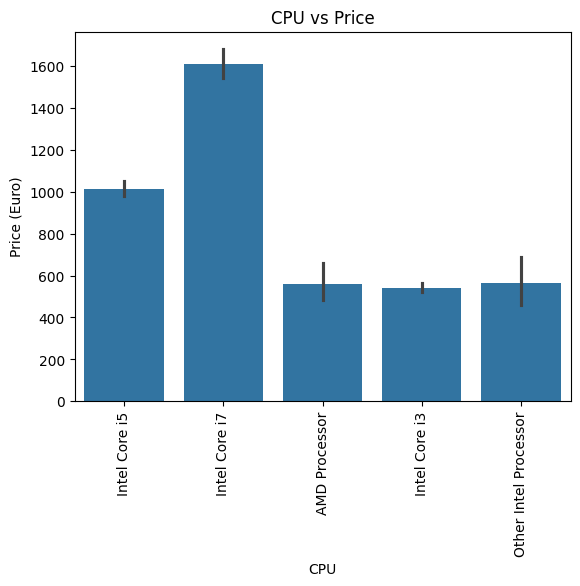

In [ ]:
sns.barplot(x = data["CPU"], y= data["Price (Euro)"])
plt.xticks(rotation = 90)
plt.title("CPU vs Price")
plt.show()

**---------- Frequency ----------**

<ipython-input-22-fc1467f4c677>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CPU_Frequency (GHz)"], kde=True)


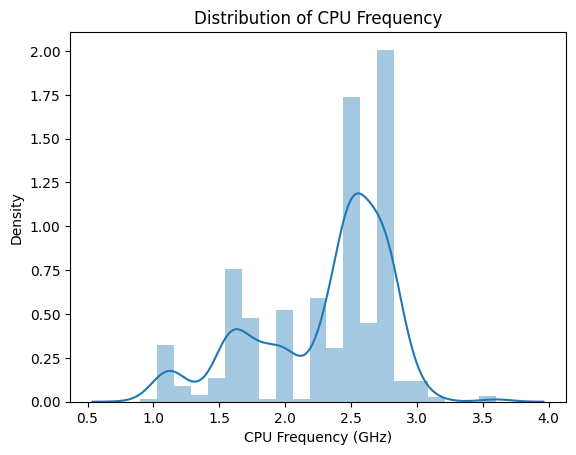

In [ ]:
sns.distplot(data["CPU_Frequency (GHz)"], kde=True)
plt.title("Distribution of CPU Frequency")
plt.xlabel("CPU Frequency (GHz)")
plt.show()

**---------- RAM ----------**

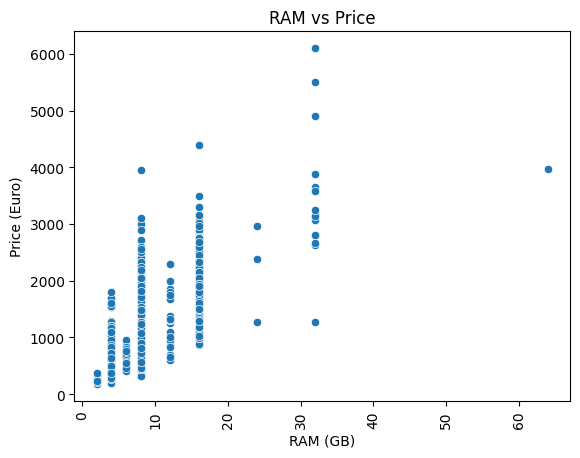

In [ ]:
sns.scatterplot(x = data["RAM (GB)"], y= data["Price (Euro)"])
plt.xticks(rotation = 90)
plt.title("RAM vs Price")
plt.show()

**---------- Memory Feature Engineering ----------**

In [ ]:
data["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
def extract_memory(memory, keyword):
    matches = re.findall(r"(\d+\.?\d*)(GB|TB)\s" + keyword, memory)
    total = 0
    for value, unit in matches:
        if unit == "GB":
            value = int(value)
        elif unit == "TB":
            value = int(float(value) * 1000)
        total += value
    return total

storage_types = ["SSD", "HDD", "Hybrid", "Flash Storage"]
for storage in storage_types:
    data[storage] = data["Memory"].apply(lambda x: extract_memory(x, storage))

In [ ]:
data = data.drop(['Memory'], axis=1)

**---------- GPU ----------**

In [ ]:
data = data.drop(["GPU_Type"], axis=1)

In [ ]:
data["GPU_Company"].value_counts()

,count
GPU_Company,
Intel,704
Nvidia,396
AMD,174
ARM,1


**Handling Row with Outliers**

In [ ]:
data[data["GPU_Company"] == "ARM"]

,Company,Product,TypeName,Inches,CPU_Frequency (GHz),RAM (GB),GPU_Company,OpSys,Weight (kg),Price (Euro),Touchscreen,IPS_Panel,X_Resolution,Y_Resolution,CPU,SSD,HDD,Hybrid,Flash Storage
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,2.0,4,ARM,Chrome OS,1.15,659.0,1,1,2400,1600,None,0,0,0,32


In [ ]:
data = data.drop(1191, axis=0)

**---------- OpSys ----------**

In [ ]:
data["OpSys"].value_counts()

,count
OpSys,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
def os(OpSys):
  if "Windows" in OpSys:
    return "Windows"
  elif "No OS" in OpSys:
    return "No OS"
  elif "Linux" in OpSys:
    return "Linux"
  elif "Mac" in OpSys or "mac" in OpSys:
    return "Mac"
  else:
    return "Chrome/Andriod"

data["OpSys"] = data["OpSys"].apply(os)

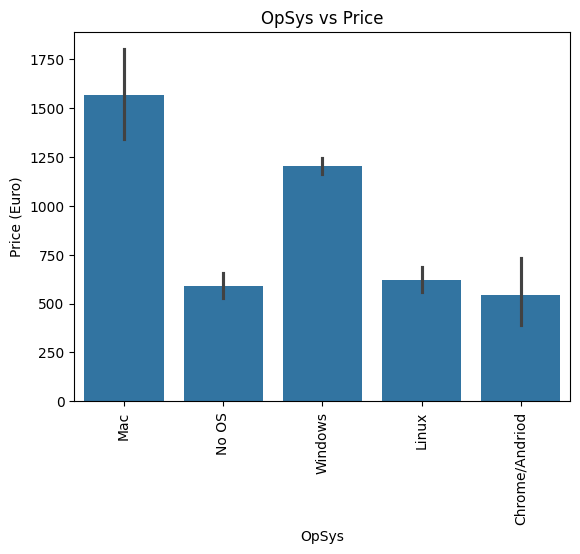

In [ ]:
sns.barplot(x = data["OpSys"], y= data["Price (Euro)"])
plt.xticks(rotation = 90)
plt.title("OpSys vs Price")
plt.show()

**---------- Weight ----------**

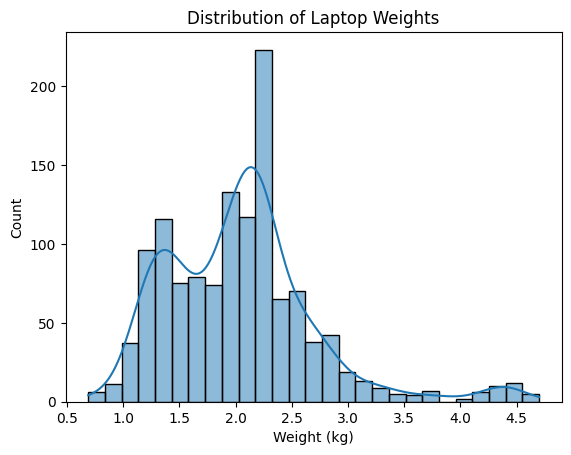

In [ ]:
sns.histplot(data['Weight (kg)'], kde=True)
plt.title("Distribution of Laptop Weights")
plt.xlabel("Weight (kg)")
plt.show()

**---------- Company ----------**

<Axes: xlabel='Company'>

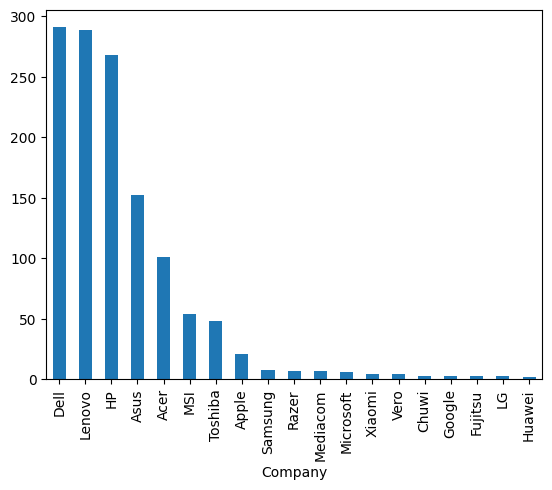

In [ ]:
data["Company"].value_counts().plot(kind="bar")

In [ ]:
def company(Company):
  top_9 = data["Company"].value_counts().head(9).index
  if Company in top_9:
    return Company
  else:
    return "Other"

data["Company"] = data["Company"].apply(company)

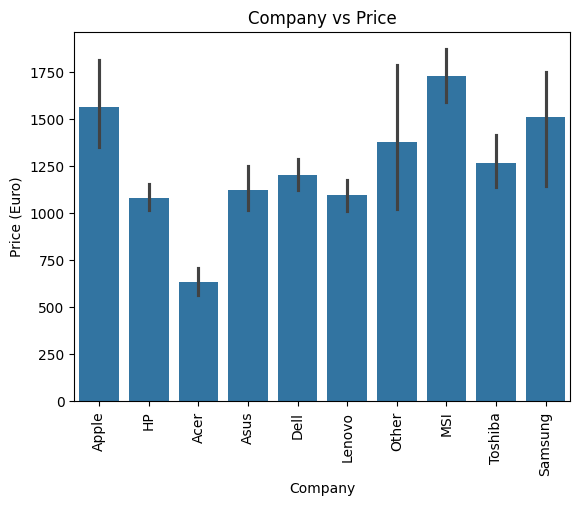

In [ ]:
sns.barplot(x = data["Company"], y= data["Price (Euro)"])
plt.xticks(rotation = 90)
plt.title("Company vs Price")
plt.show()

**---------- Product ----------**

In [ ]:
data["Product"].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
VivoBook E201NA,1
Ideapad 520-15IKBR,1
Thinkpad X260,1


In [ ]:
data["Product"] = data["Product"].apply(lambda x: x.split()[0])

In [ ]:
def product(Product):
  top_9 = data["Product"].value_counts().head(9).index
  if Product in top_9:
    return Product

  else:
    return "Other"
data["Product"] = data["Product"].apply(product)

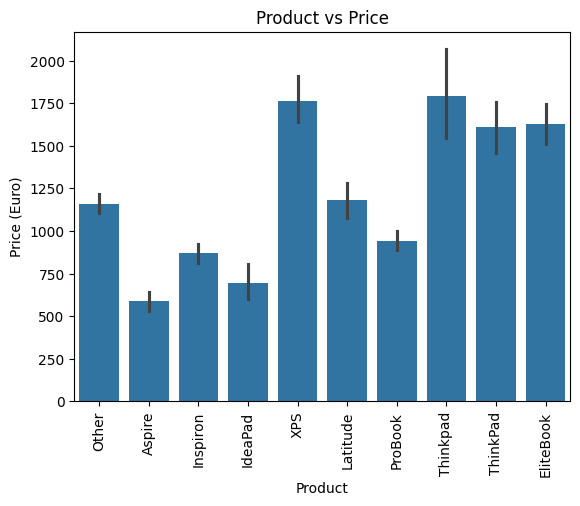

In [ ]:
sns.barplot(x = data["Product"], y= data["Price (Euro)"])
plt.xticks(rotation = 90)
plt.title("Product vs Price")
plt.show()

**Correlation of Columns**

In [ ]:
numeric_df = data.select_dtypes(include=['number'])
correlations = numeric_df.corr()['Price (Euro)']
print(correlations)

Inches                 0.065697
CPU_Frequency (GHz)    0.428665
RAM (GB)               0.740176
Weight (kg)            0.211359
Price (Euro)           1.000000
Touchscreen            0.190636
IPS_Panel              0.251892
X_Resolution           0.553355
Y_Resolution           0.550360
SSD                    0.670088
HDD                   -0.098577
Hybrid                 0.022555
Flash Storage         -0.036568
Name: Price (Euro), dtype: float64


In [ ]:
data = data.drop(["Flash Storage", "Hybrid", "TypeName"], axis=1)

<Axes: >

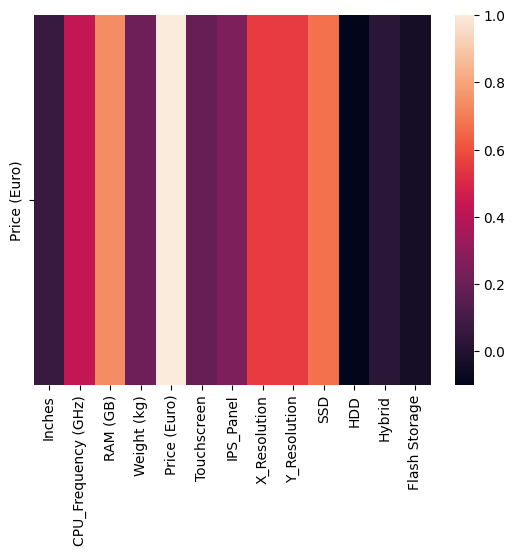

In [ ]:
sns.heatmap(correlations.to_frame().T, annot=False)

In [ ]:
data.head(1)

,Company,Product,Inches,CPU_Frequency (GHz),RAM (GB),GPU_Company,OpSys,Weight (kg),Price (Euro),Touchscreen,IPS_Panel,X_Resolution,Y_Resolution,CPU,SSD,HDD
0,Apple,Other,13.3,2.3,8,Intel,Mac,1.37,1339.69,0,1,2560,1600,Intel Core i5,128,0


**Spliting Data for Training and Testing**

In [ ]:
x = data.drop("Price (Euro)", axis=1)
y = data["Price (Euro)"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=70)

**OneHotEncoding for Object Type Data**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0, 1, 5, 6, 12])
],remainder='passthrough')

**Training, Fitting, and Predicting with Various Models**

In [ ]:
linear_regression = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',linear_regression)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8614738986052881
MAE 170.29113590368826


In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',decision_tree)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8829200570941806
MAE 155.26735875940636


In [ ]:
ridge = Ridge(alpha=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',ridge)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8712660389357666
MAE 165.38889084847779


In [ ]:
lasso = Lasso(alpha=0.001)
pipe = Pipeline([
    ('step1',step1),
    ('step2',lasso)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8615019025209127
MAE 170.278593216013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.625e+07, tolerance: 6.150e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',random_forest)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.913664657571148
MAE 132.1018206890558


In [ ]:
gradient_boosting = GradientBoostingRegressor()
pipe = Pipeline([
    ('step1',step1),
    ('step2',gradient_boosting)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9172867134205488
MAE 125.05567854653282


In [ ]:
adaboost = AdaBoostRegressor()
pipe = Pipeline([
    ('step1',step1),
    ('step2',adaboost)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5591279694055595
MAE 340.07787712201275


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',KNN)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.860437527887942
MAE 170.5541111111111


In [ ]:
svr= SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',svr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7240976276289486
MAE 195.64756357832675


In [ ]:
xgb= XGBRegressor(n_estimators=200, max_depth=9, learning_rate=0.01)

pipe = Pipeline([
    ('step1',step1),
    ('step2',xgb)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9028479249739866
MAE 140.54276049804687


**Checking Models Rank**

In [ ]:
models = [
    "Linear Regression (lg)",
    "Decision Tree (dt)",
    "Ridge (r)",
    "Lasso (l)",
    "Random Forest (rf)",
    "Gradient Boosting (gb)",
    "AdaBoost (ab)",
    "KNN (knn)",
    "SVR (svr)",
    "XGBoost (xgb)"
]

r2_scores = [
    0.8614738986052881,
    0.8829200570941806,
    0.8712660389357666,
    0.8615019025209127,
    0.913664657571148,
    0.9172867134205488,
    0.5591279694055595,
    0.860437527887942,
    0.7240976276289486,
    0.9028479249739866
]

mae_scores = [
    170.29113590368826,
    155.26735875940636,
    165.38889084847779,
    170.278593216013,
    132.1018206890558,
    125.05567854653282,
    340.07787712201275,
    170.5541111111111,
    195.64756357832675,
    140.54276049804687
]

results = []
for model, r2, mae in zip(models, r2_scores, mae_scores):
    results.append([model, r2, mae])

results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "MAE"])

results_df["Rank"] = results_df["R2_Score"].rank(method="dense", ascending=False).astype(int)
sorted_results = results_df[["Rank", "Model", "R2_Score", "MAE"]].sort_values(by="Rank")

print(sorted_results)

   Rank                   Model  R2_Score         MAE
5     1  Gradient Boosting (gb)  0.917287  125.055679
4     2      Random Forest (rf)  0.913665  132.101821
9     3           XGBoost (xgb)  0.902848  140.542760
1     4      Decision Tree (dt)  0.882920  155.267359
2     5               Ridge (r)  0.871266  165.388891
3     6               Lasso (l)  0.861502  170.278593
0     7  Linear Regression (lg)  0.861474  170.291136
7     8               KNN (knn)  0.860438  170.554111
8     9               SVR (svr)  0.724098  195.647564
6    10           AdaBoost (ab)  0.559128  340.077877


**Assessing Model Fit: Underfitting or Overfitting**

In [ ]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor()
pipe = Pipeline([
    ('step1',step1),
    ('step2',gradient_boosting)
])

pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
print("Training Data-----------")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))

y_pred = pipe.predict(x_test)
print("Testing Data-----------")
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Training Data-----------
R2 score 0.8911044904690136
MAE 163.02872736969536
Testing Data-----------
R2 score 0.9175278190353693
MAE 123.5823801220637


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown ca

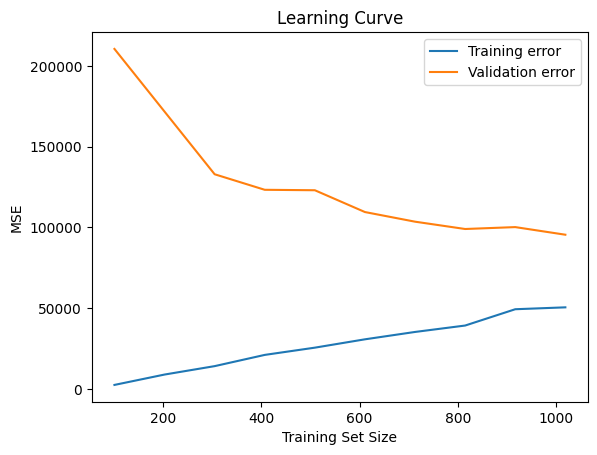

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe, x, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

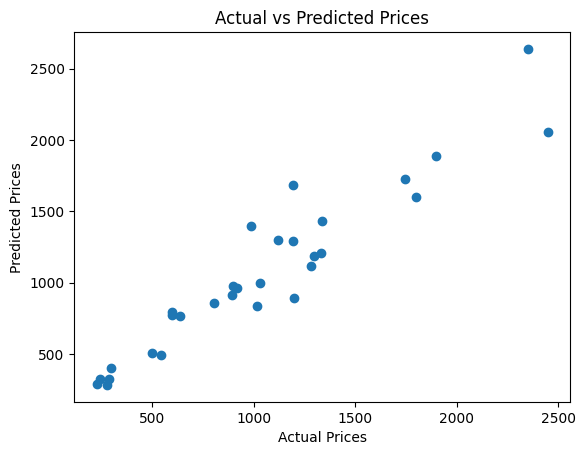

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
# XGB
xgb= XGBRegressor(n_estimators=200, max_depth=9, learning_rate=0.01)

pipe = Pipeline([
    ('step1',step1),
    ('step2',xgb)
])

pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
print("Training Data-----------")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))

y_pred = pipe.predict(x_test)
print("Testing Data-----------")
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Training Data-----------
R2 score 0.9171047768696972
MAE 144.34007970386762
Testing Data-----------
R2 score 0.9028479249739866
MAE 140.54276049804687


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown ca

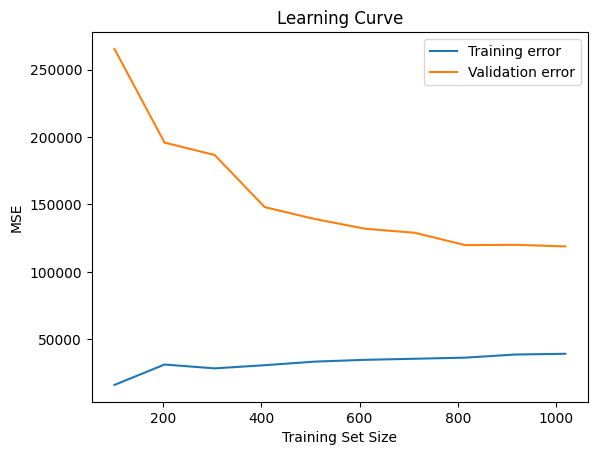

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe, x, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [ ]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=50, max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',random_forest)
])

pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
print("Training Data-----------")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))

y_pred = pipe.predict(x_test)
print("Testing Data-----------")
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Training Data-----------
R2 score 0.9080819129842415
MAE 149.28334377626567
Testing Data-----------
R2 score 0.8965781675922349
MAE 137.8047800017916


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown ca

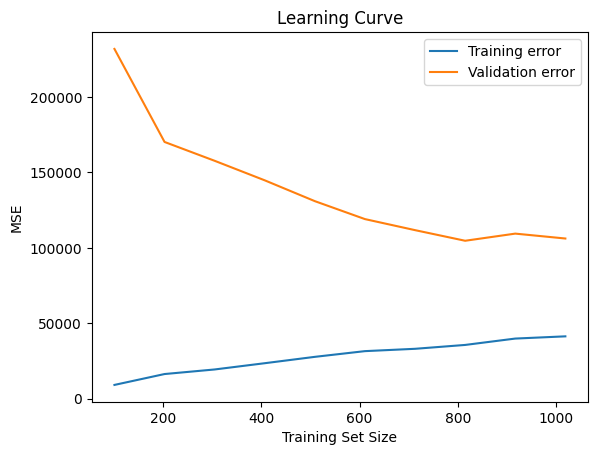

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe, x, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

**Best Model Performance: Gradient Boosting Regressor**

**Exporting the Model**

In [ ]:
with open("laptop_model.pkl", "wb") as file:
  pickle.dump(pipe, file)
print("Model saved successfully")

Model saved successfully


In [ ]:
with open("data.pkl", "wb") as file:
  pickle.dump(data, file)
print("Data saved successfully")

Data saved successfully
